In [2]:
import neat
import pickle


In [3]:
#load checkpoint/biased_west which is a neat checkpoint

# p = neat.Checkpointer.restore_checkpoint("checkpoints/biased_west/49")
# or load pickle file


with open("best.pickle", "rb") as f:
    p = pickle.load(f)




In [53]:
#load self_dump.pkl
with open("self_dump.pkl", "rb") as f:
    q = pickle.load(f)

In [6]:
p.fitness

0.8

In [56]:
p.fitness

2.6

In [19]:
p

In [39]:
q = neat.Checkpointer.restore_checkpoint("checkpoints/biased_west/49")


In [ ]:
for 

{47: <neat.genome.DefaultGenome at 0x7a9bc7fb25f0>,
 14: <neat.genome.DefaultGenome at 0x7a9bc7fb3930>,
 35: <neat.genome.DefaultGenome at 0x7a9bc7d9c6e0>,
 1: <neat.genome.DefaultGenome at 0x7a9bc7d9d470>,
 2: <neat.genome.DefaultGenome at 0x7a9bc7d9e200>,
 3: <neat.genome.DefaultGenome at 0x7a9bc7d9ef20>,
 4: <neat.genome.DefaultGenome at 0x7a9bc7d9fbd0>,
 5: <neat.genome.DefaultGenome at 0x7a9bc5e60980>,
 6: <neat.genome.DefaultGenome at 0x7a9bc5e61630>,
 7: <neat.genome.DefaultGenome at 0x7a9bc5e62350>,
 8: <neat.genome.DefaultGenome at 0x7a9bc5e63070>,
 9: <neat.genome.DefaultGenome at 0x7a9bc5e63d90>,
 10: <neat.genome.DefaultGenome at 0x7a9bc592cbb0>,
 11: <neat.genome.DefaultGenome at 0x7a9bc592d940>,
 12: <neat.genome.DefaultGenome at 0x7a9bc592e5f0>,
 13: <neat.genome.DefaultGenome at 0x7a9bc592f380>,
 15: <neat.genome.DefaultGenome at 0x7a9bc56041a0>,
 16: <neat.genome.DefaultGenome at 0x7a9bc5604f30>,
 17: <neat.genome.DefaultGenome at 0x7a9bc5605cc0>,
 18: <neat.genome.Def

In [5]:
dir(p)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_reporter',
 'best_genome',
 'config',
 'fitness_criterion',
 'generation',
 'population',
 'remove_reporter',
 'reporters',
 'reproduction',
 'run',
 'species']

In [54]:
from neat.six_util import iteritems, itervalues
max = 0
for k, v in iteritems(q.population):
    if v.fitness and v.fitness > max:
        max = v.fitness
    #     print(k, v.fitness, v.nodes, v.connections, v.species)
    # print(v)
    # print(k, v.fitness, v.nodes, v.connections)
    # print(k, v.fitness, v.nodes, v.connections, v.species)

print(max)

2.6


In [36]:
p.fitness

2.0

In [33]:
print(p.connections[(-1, 0)])

DefaultConnectionGene(key=(-1, 0), weight=-1.3022086545306968, enabled=False)


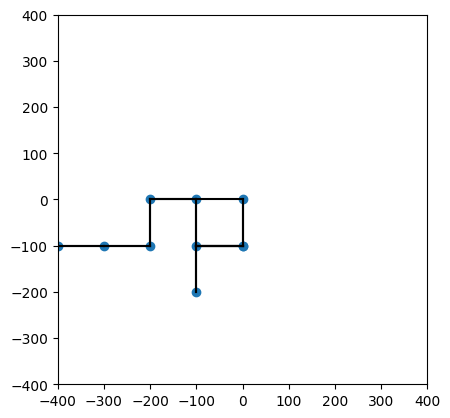

In [4]:
import random 
import math

def foodGenerator(root_coords, num_of_food, sensor_length, num_sensors ):
    # num_sensors = 8

    agent_pos = root_coords
    first_food = random.randint(0,num_sensors-1)  # Randomly select a sensor to place the first food item
    
    #coordinate of first food 

    angle = 2 * math.pi * first_food / num_sensors
    x1 = agent_pos[0] + sensor_length * math.cos(angle)
    y1 = agent_pos[1] + sensor_length * math.sin(angle)

    food_coords = [(x1,y1)]

    #each food item is a node and each node can have children. track each node's children and what sensor was used to generate each child
    food_children = {}
    #keep track of viable parents. these are nodes with less than 3 children that can have more children. Also keep track of what sensor this was made on
    viable_parents = [(x1,y1,first_food)]
    edges = []

    while len(food_coords) < num_of_food:
        #pick a random viable parent and update agent position as this coordinate and store the sensor that was used to generate this food
        _ = viable_parents[random.randint(0,len(viable_parents)-1)]
        agent_pos = (_[0], _[1])
        sensor = _[2]
        #if this parent has children, check if either sensors sensor, sensor+1 and sensor-1 are available and store them in a list
        available_sensors = []
        for i in range(-1,2):
            #check is sensor + i is occupied by any of the food object's children
            #iterate through food_children[agent_pos] and check if sensor + i is occupied
            occupied = False
            if agent_pos in food_children:
                for child in food_children[agent_pos]:
                    if (child[2] + i) % num_sensors == sensor:
                        occupied = True
                        break
            if not occupied:
                available_sensors.append((sensor + i) % num_sensors)

        #if there are available sensors, pick one at random and generate a new food object
        if len(available_sensors) > 0:
            new_sensor = available_sensors[random.randint(0,len(available_sensors)-1)]
            angle = 2 * math.pi * new_sensor / num_sensors
            x1 = agent_pos[0] + sensor_length * math.cos(angle)
            y1 = agent_pos[1] + sensor_length * math.sin(angle)
            food_coords.append((x1,y1))
            edges.append((agent_pos,(x1,y1)))
            viable_parents.append((x1,y1,new_sensor))
            if agent_pos in food_children:
                food_children[agent_pos].append((x1,y1,new_sensor))
            else:
                food_children[agent_pos] = [(x1,y1,new_sensor)]
            edges.append((agent_pos,(x1,y1)))
            if len(food_children[agent_pos]) == 3:
                viable_parents.remove((agent_pos[0],agent_pos[1],sensor))
        
        
    edges.append((root_coords, food_coords[0]))
    return food_coords, edges

if __name__ == "__main__":
    food_pos, edges = foodGenerator((0, 0), 10, 100, 4)
    #plot the food positions
    import matplotlib.pyplot as plt
    x = [i[0] for i in food_pos]
    y = [i[1] for i in food_pos]
    plt.scatter(x, y)
    for edge in edges:
        plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], 'k-')
    plt.xlim(-400, 400)
    plt.ylim(-400, 400)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()